<a href="https://colab.research.google.com/github/Cutie-tee/nlp_project/blob/main/nlp_textclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Data

In [21]:
import pandas as pd
#Load the dataset
data =pd.read_csv('/content/training_data_lowercase.csv')
# column names
column_names = data.columns.tolist()
print("Column names:", column_names)
data.head()

Column names: ['0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing']


,0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing
0,0\tdrunk bragging trump staffer started russia...
1,0\tsheriff david clarke becomes an internet jo...
2,0\ttrump is so obsessed he even has obama‚s na...
3,0\tpope francis just called out donald trump d...
4,0\tracist alabama cops brutalize black boy whi...


In [22]:
# Reload the CSV with tab delimiter
data = pd.read_csv('/content/training_data_lowercase.csv', delimiter='\t')


# Rename the columns for clarity
data.columns = ['label', 'text']
# Display the first few rows to confirm
data.head()


,label,text
0,0,drunk bragging trump staffer started russian c...
1,0,sheriff david clarke becomes an internet joke ...
2,0,trump is so obsessed he even has obama‚s name ...
3,0,pope francis just called out donald trump duri...
4,0,racist alabama cops brutalize black boy while ...


Data Preprocessing ( Cleaning& Tokenisation)

In [105]:
#Clean the text to convert to lowercase, remove punctuation, whitespace , stop words, toeksnising andlemmatising

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words and preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['label'] = data['label'].astype(int)

# Apply preprocessing to the 'text' column
data['cleaned_text'] = data['text'].apply(preprocess_text)
data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,text,cleaned_text
0,0,drunk bragging trump staffer started russian c...,drunk bragging trump staffer started russian c...
1,0,sheriff david clarke becomes an internet joke ...,sheriff david clarke becomes internet joke thr...
2,0,trump is so obsessed he even has obama‚s name ...,trump obsessed even obama‚s name coded website...
3,0,pope francis just called out donald trump duri...,pope francis called donald trump christmas speech
4,0,racist alabama cops brutalize black boy while ...,racist alabama cops brutalize black boy handcu...


 Vectorize Text Data with TF-IDF

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']
print('X', y)


X 0        0
1        0
2        0
3        0
4        0
        ..
34146    1
34147    1
34148    1
34149    1
34150    1
Name: label, Length: 34151, dtype: int64


Train-Test Split

In [107]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (27320, 20000)
X_test shape: (6831, 20000)


Model Training with Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

# Initialize and train classifier
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Evaluate the model

In [109]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9352949787732396
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3515
           1       0.93      0.94      0.93      3316

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831



In [110]:

import joblib
joblib.dump(model, "fake_news_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

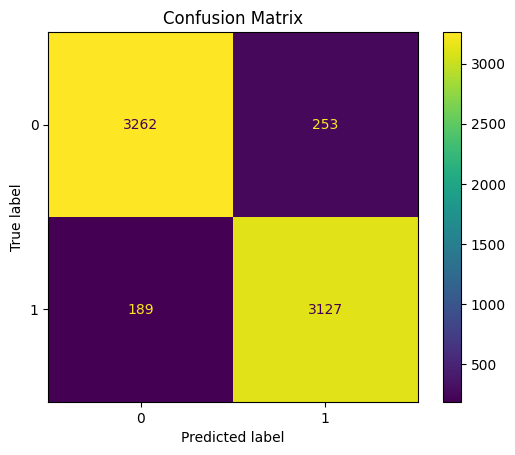

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import the matplotlib library

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


Cross validation with SVM  


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import numpy as np

# Extract text and labels
texts = data['text']
labels = data['label']

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
y = labels



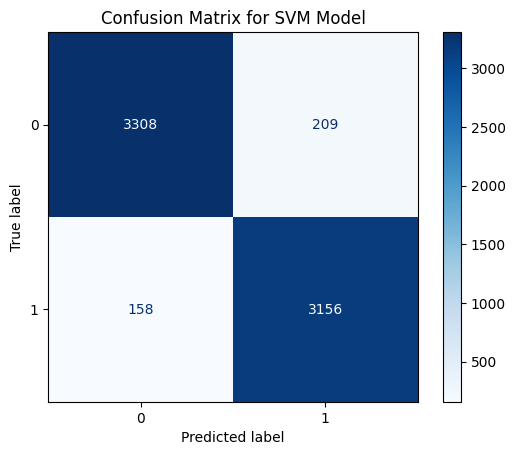

Accuracy: 0.9462743375786854
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3517
           1       0.94      0.95      0.95      3314

    accuracy                           0.95      6831
   macro avg       0.95      0.95      0.95      6831
weighted avg       0.95      0.95      0.95      6831

Cross-Validation Scores for each fold: [0.90469917 0.92093704 0.9033675  0.94304539 0.93704246]
Average Cross-Validation Score: 0.9218183104197492


In [63]:

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=5)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model and predict on the test set
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Generate confusion matrix for SVM model
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.show()

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

# classification report
print(classification_report(y_test, y_pred_svm))

# Print the accuracy for each fold and the mean accuracy
print("Cross-Validation Scores for each fold:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))



Logistic Regression Tuning

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.9462298682284042


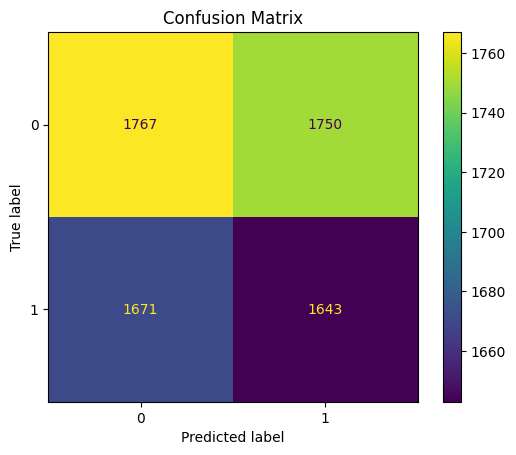

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()



SVM Tuning

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9482430453879941


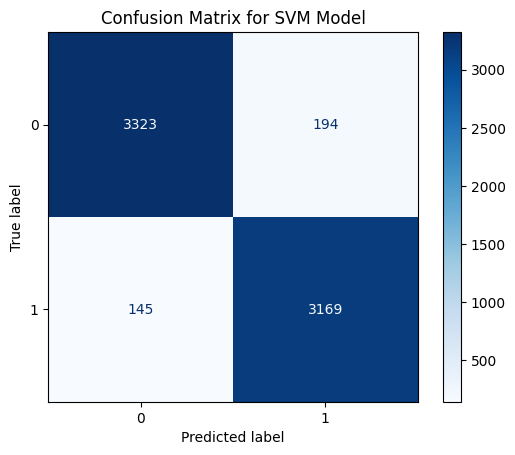

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svm.best_params_)
print("Best cross-validation accuracy:", grid_svm.best_score_)

# Get predictions on the test set using the best estimator found by GridSearchCV
y_pred = grid_svm.predict(X_test)

# Generate the confusion matrix using the predictions and true labels
cm_svm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.show()

**Model Deployment using Gradio**

In [33]:
#To save the model

import joblib
joblib.dump(model, "fake_news_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")



['tfidf_vectorizer.pkl']

Setting up the environment

In [34]:
!pip install gradio


In [35]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words and preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['label'] = data['label'].astype(int)

# Apply preprocessing to the 'text' column
data['cleaned_text'] = data['text'].apply(preprocess_text)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']

from sklearn.linear_model import LogisticRegression

# Initialize and train classifier
model = LogisticRegression()
model.fit(X, y)

#Gradio should do is to make a single predcition from text
text="Donald Trump makes controversial statement about immigration policy"
texted_clean = preprocess_text(text)
print(texted_clean)
# Text - > to numbers
text_vector = vectorizer.transform([texted_clean])
print(text_vector)
# numbers to prediction
prediction = model.predict(text_vector)
print(prediction)
#


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


donald trump makes controversial statement immigration policy
  (0, 934)	0.3942383800242166
  (0, 1255)	0.2420158114699283
  (0, 1256)	0.24466899316815272
  (0, 2068)	0.30177771786304586
  (0, 2070)	0.43971112302345683
  (0, 2556)	0.2868563521472095
  (0, 3164)	0.2984188207687365
  (0, 4050)	0.3254493521104369
  (0, 4403)	0.10548865984360602
  (0, 4467)	0.3915869894243527
[0]


In [64]:
import gradio as gr
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np


def preprocess_input(text):
    #use our best model with their preprocess + vectorization
    texted_clean = preprocess_text(text.lower())
    text_vector = vectorizer.transform([texted_clean])
    prediction = model.predict(text_vector)

    # Get prediction and probability
    prediction = model.predict(text_vector)[0]
    probabilities = model.predict_proba(text_vector)[0]

    # Format confidence score
    confidence = np.max(probabilities) * 100

    # Create result message
    if prediction == 0:
        label = "Unreliable News"
    else:
        label = "Reliable News"

    return f"{label} and {prediction} (Confidence: {confidence:.2f}%)"

# Create Gradio interface
iface = gr.Interface(
    fn=preprocess_input,
    inputs=["text"],
    outputs=["text"],
    title="Teju & Marvin Real Time News Classifier",
    description="This model classifies news as reliable or unreliable based on the text content.",
    examples=[
        ["Donald Trump makes controversial statement about immigration policy"],
        ["New study reveals important breakthrough in cancer research"],
        ["Scientists discover new species in Amazon rainforest"]
    ]
)

# Launch the app
if __name__ == "__main__":
    iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a25cdff79eb7b5d425.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://a25cdff79eb7b5d425.gradio.live


Test

Load test data

In [66]:
import pandas as pd

# Load test data
test_data = pd.read_csv('data_test_news_only.csv')
test_texts = test_data['news']

Load model and vectorizer

In [112]:
# Load the model and vectorizer
import joblib  # Import the joblib library

# Load the model and vectorizer
model = joblib.load('fake_news_model.pkl')  # Use joblib.load to load the model
vectorizer = joblib.load('tfidf_vectorizer.pkl')  # Use joblib.load to load the vectorizer

preprocessed_texts = test_texts.apply(preprocess_text)
model.predict(vectorizer.transform(preprocessed_texts))


array([0, 0, 0, ..., 0, 1, 1])

Making predictions ii

In [114]:
predictions = model.predict(vectorizer.transform(preprocessed_texts))
test_data['prediction'] = predictions
test_data['label'] = test_data['prediction'].apply(lambda x: 'Reliable news' if x == 1 else 'Unreliable news')
test_data.head()



,Unnamed: 0,news,prediction,label
0,0,Southside Chicago Blacks Fight Against Liberal...,0,Unreliable news
1,1,WIFE OF LIONS QUARTERBACK Matthew Stafford Jus...,0,Unreliable news
2,2,HEY CNN‚Ä¶REMEMBER OBAMA‚ÄôS Notorious ‚ÄúFrid...,0,Unreliable news
3,3,BREAKING NEWS: SEBASTIAN GORKA OUT‚Ä¶Are Ivank...,0,Unreliable news
4,4,First Grader ‚ÄúInvestigated‚Äù in Principal‚Ä...,0,Unreliable news


results

In [115]:
print(test_data[['news', 'label']])

                                                   news            label
0     Southside Chicago Blacks Fight Against Liberal...  Unreliable news
1     WIFE OF LIONS QUARTERBACK Matthew Stafford Jus...  Unreliable news
2     HEY CNN‚Ä¶REMEMBER OBAMA‚ÄôS Notorious ‚ÄúFrid...  Unreliable news
3     BREAKING NEWS: SEBASTIAN GORKA OUT‚Ä¶Are Ivank...  Unreliable news
4     First Grader ‚ÄúInvestigated‚Äù in Principal‚Ä...  Unreliable news
...                                                 ...              ...
9978  'Fully committed' NATO backs new U.S. approach...    Reliable news
9979  LexisNexis withdrew two products from Chinese ...    Reliable news
9980  Minsk cultural hub becomes haven from authorities  Unreliable news
9981  Vatican upbeat on possibility of Pope Francis ...    Reliable news
9982  Indonesia to buy $1.14 billion worth of Russia...    Reliable news

[9983 rows x 2 columns]
